In [1]:
!pip install dask

In [2]:
import dask.array as da

In [3]:
a = da.arange(18,chunks=4)

In [4]:
a.compute()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [5]:
a.chunks

((4, 4, 4, 4, 2),)

In [6]:
a

dask.array<arange, shape=(18,), dtype=int32, chunksize=(4,), chunktype=numpy.ndarray>

In [7]:
import pandas as pd

In [8]:
%time temp = pd.read_csv('HR_comma_sep.csv')

Wall time: 17.9 ms


In [9]:
import dask.dataframe as dd

In [10]:
%time df = dd.read_csv('HR_comma_sep.csv')

Wall time: 16.1 ms


In [16]:
import dask.dataframe as dd
import pandas as pd

In [17]:
df = pd.DataFrame({'P':[10,20,30], 'Q':[40,50,60]}, index=['p','q','r'])

In [19]:
ddf = dd.from_pandas(df,npartitions=2)

In [20]:
ddf.head()

C:\Users\Min-A\anaconda3\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,P,Q
p,10,40
q,20,50
r,30,60


In [22]:
ddf[['Q','P']]

,Q,P
npartitions=1,,
p,int64,int64
r,...,...


In [23]:
import dask.dataframe as dd
import pandas as pd

In [24]:
df = pd.DataFrame({'X':[11,12,13],'Y':[41,51,61]})

In [25]:
ddf = dd.from_pandas(df,npartitions=2)

In [26]:
ddf.head()

C:\Users\Min-A\anaconda3\lib\site-packages\dask\dataframe\core.py:6194: UserWarning: Insufficient elements for `head`. 5 elements requested, only 3 elements available. Try passing larger `npartitions` to `head`.
  warnings.warn(msg.format(n, len(r)))


,X,Y
0,11,41
1,12,51
2,13,61


In [27]:
ddf.iloc[:,[1,0]].compute()

,Y,X
0,41,11
1,51,12
2,61,13


In [31]:
ddf.iloc[:,[1,0]].compute()

,Y,X
0,41,11
1,51,12
2,61,13


In [34]:
ddf[['X']].compute()

,X
0,11
1,12
2,13


In [35]:
ddf = dd.read_csv('HR_comma_sep.csv')

In [36]:
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [37]:
ddf2 = ddf[ddf.salary=='low']

In [39]:
ddf2.compute().head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [40]:
ddf2.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [42]:
ddf.compute()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [45]:
ddf.groupby('left').mean().compute()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [46]:
from dask import dataframe as dd

In [48]:
type(ddf)

dask.dataframe.core.DataFrame

In [49]:
type(df)

pandas.core.frame.DataFrame

In [50]:
ddf = dd.from_pandas(df,chunksize=4)

In [53]:
type(ddf)

dask.dataframe.core.DataFrame

In [55]:
pd_df = ddf.compute()

In [56]:
pd_df

,X,Y
0,11,41
1,12,51
2,13,61


In [58]:
type(pd_df)

pandas.core.frame.DataFrame

In [59]:
import dask.bag as db

In [60]:
items_bag = db.from_sequence([1,2,3,4,5,6,7,8,9,10], npartitions=3)

In [61]:
items_bag.take(2)

(1, 2)

In [71]:
items_odd = items_bag.filter(lambda x: x if x % 2 !=0 else None)

In [72]:
items_odd.compute()

[1, 3, 5, 7, 9]

In [77]:
items_square = items_bag.map(lambda x: x**2)

In [78]:
items_square.compute()

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]

In [79]:
import dask.bag as db

In [80]:
text = db.read_text('sample.txt')

In [82]:
text.compute()

['Hi! how are you? \n', '\n']

In [83]:
text.take(2)

('Hi! how are you? \n', '\n')

In [84]:
text.to_textfiles('/path/to/data/*.text.gz')

['C:/path/to/data/0.text.gz']

In [85]:
import dask.bag as db

In [87]:
dict_bag = db.from_sequence([{'item_name': 'Egg', 'price':5}, {'item_name': 'Bread', 'price': 20}, {'item_name': 'Milk', 'price':54}], npartitions=2)

In [89]:
dict_bag.compute()

[{'item_name': 'Egg', 'price': 5},
 {'item_name': 'Bread', 'price': 20},
 {'item_name': 'Milk', 'price': 54}]

In [90]:
df = dict_bag.to_dataframe()

In [111]:
df.compute().reset_index(drop=True)

,item_name,price
0,Egg,5
1,Bread,20
2,Milk,54


In [105]:
pd_df = pd_df.reset_index(drop=True)

In [106]:
pd_df

,item_name,price
0,Egg,5
1,Bread,20
2,Milk,54


In [1]:
from dask import delayed, compute

In [2]:
@delayed
def cube(item):
    return item**3

@delayed
def average(items):
    return sum(items)/len(items)

item_list = [2,3,4]

cube_list = [cube(i) for i in item_list]

computation_graph = average(cube_list)
computation_graph.compute()

33.0

In [114]:
!pip install graphviz

In [116]:
import os

In [117]:
os.environ["PATH"] += os.pathsep + 'D:/Program Files (x86)/Graphviz2.38/bin/'

In [119]:
!conda install python-graphviz

^C


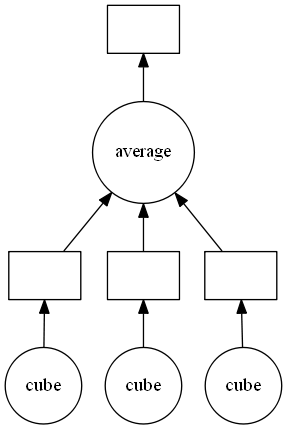

In [3]:
computation_graph.visualize()

In [4]:
delayed?

In [5]:
import dask.dataframe as dd

In [6]:
ddf = dd.read_csv('HR_comma_sep.csv')

In [7]:
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [8]:
from sklearn.preprocessing import MinMaxScaler

In [9]:
scaler = MinMaxScaler(feature_range=(0,100))

In [10]:
scaler.fit(ddf[['last_evaluation']])

MinMaxScaler(feature_range=(0, 100))

In [11]:
performance_score = scaler.transform(ddf[['last_evaluation']])

In [13]:
performance_score

array([[26.5625],
       [78.125 ],
       [81.25  ],
       ...,
       [26.5625],
       [93.75  ],
       [25.    ]])

In [14]:
import dask.dataframe as dd

In [15]:
ddf = dd.read_csv('HR_comma_sep.csv')

In [16]:
ddf.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [18]:
from dask_ml.preprocessing import Categorizer, OneHotEncoder
from sklearn.pipeline import make_pipeline

ModuleNotFoundError: No module named 'dask_ml'

In [19]:
!pip install dask-ml

In [20]:
from dask_ml.preprocessing import Categorizer, OneHotEncoder

In [21]:
from sklearn.pipeline import make_pipeline

In [28]:
pipe1 = make_pipeline(Categorizer())

In [29]:
pipe1.fit(ddf[['salary',]])

Pipeline(steps=[('categorizer', Categorizer())])

In [30]:
result1 = pipe1.transform(ddf[['salary',]])

In [31]:
result1.head()

,salary
0,low
1,medium
2,medium
3,low
4,low


In [32]:
from dask_ml.preprocessing import Categorizer, OrdinalEncoder
from sklearn.pipeline import make_pipeline

In [33]:
pipe = make_pipeline(Categorizer(), OrdinalEncoder())
pipe.fit(ddf[['salary',]])
result = pipe.transform(ddf[['salary',]])

In [50]:
result.head(73)

,salary
0,0
1,1
2,1
3,0
4,0
...,...
68,1
69,1
70,1
71,1


In [51]:
import pandas as pd

In [53]:
df = pd.read_csv('HR_comma_sep.csv')

In [54]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Departments,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [55]:
data = df[['satisfaction_level', 'last_evaluation']]

In [57]:
label = df['left']

In [58]:
from dask.distributed import Client

In [59]:
client = Client()

In [64]:
from sklearn.externals.joblib import parallel_backend

In [62]:
import joblib
import sys

In [63]:
sys.modules['sklearn.externals.joblib'] = joblib

In [66]:
with parallel_backend('dask'):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.model_selection import train_test_split
    
    X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.2, random_state=0)
    
    model = RandomForestClassifier()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.9206666666666666


In [67]:
import dask.dataframe as dd
ddf = dd.read_csv('HR_comma_sep.csv')

In [68]:
data = ddf[['satisfaction_level', 'last_evaluation']].to_dask_array(lengths=True)

In [69]:
label = ddf['left'].to_dask_array(lengths=True)

In [71]:
from dask_ml.linear_model import LogisticRegression
from dask_ml.model_selection import train_test_split

In [72]:
X_train, X_test, y_train, y_test = train_test_split(data,label)

In [73]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))

Accuracy: 0.786


In [74]:
data = ddf[['satisfaction_level', 'last_evaluation']].to_dask_array(lengths=True)

In [75]:
from dask_ml.cluster import KMeans

In [76]:
model = KMeans(n_clusters=3)

In [77]:
model.fit(data)

KMeans(n_clusters=3)

In [78]:
label = model.labels_

In [79]:
label.compute()

array([0, 2, 0, ..., 0, 0, 0])

In [80]:
import matplotlib.pyplot as plt

In [81]:
x = data[:,0].compute()
y = data[:,1].compute()
cluster_labels = label.compute()

In [83]:
data.compute()

array([[0.38, 0.53],
       [0.8 , 0.86],
       [0.11, 0.88],
       ...,
       [0.37, 0.53],
       [0.11, 0.96],
       [0.37, 0.52]])

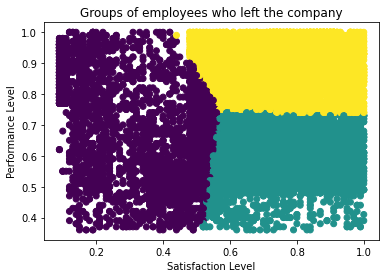

In [85]:
plt.scatter(x,y,c=cluster_labels)
plt.xlabel('Satisfaction Level')
plt.ylabel('Performance Level')
plt.title('Groups of employees who left the company')
plt.show()